<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210607_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9C%84%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIGO(Garbage In Garbage Out)
* 머신러닝에서 제일 중요한 요소중 하나는 깨끗한 데이터를 사용 하는 것
* 똑같은 데이터세트를 사용하더라도, 데이터의 전처리나, 분석 방법 등에 따라서 성능이 굉장히 많이 차이 난다.

캐리포니아 주택가격 데이터세트 가져오기

In [ ]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정 - 기본 경로/dataset/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 url
def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # url로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기
fetch_housing_data()

In [ ]:
# 다운받은 데이터셋(csv) 파일을  판다스 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename='housing.csv'):
    csv_path = os.path.join(housing_path, filename) #(폴더, 파일이름)
    return pd.read_csv(csv_path) # 데이터 프레임 리턴

데이터 세트 확인하기

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# housing 데이터 알아보기
각 컬럼의 의미를 살펴보기

* longitude : 경도
* latitude : 위도
* housing_median_age : 중간 주택 연도
* total_rooms : 방의 총 개수
* total_bedrooms : 침실의 총 개수
* population : 인구
* households : 가구
* median_income : 중간 소득
* median_house_value : 중간 주택 가격
* ocean_proximity : 바다와의 거리


# 데이터 프레임의 기본 정보 확인
- **info()**를 활용해서 원하는 데이터의 형식으로 존재하는지 확인할 것

In [ ]:
housing.info() ##bedroom의 NaN값을 처리해야 된다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 데이터프레임의 통계적인 특성 확인해 보기
- 수치데이터가 대부분이기 때문에 Describe로 통계의 특성도 알아보기

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 데이터의 형태를 빠르게 검토하기 _ 시각화

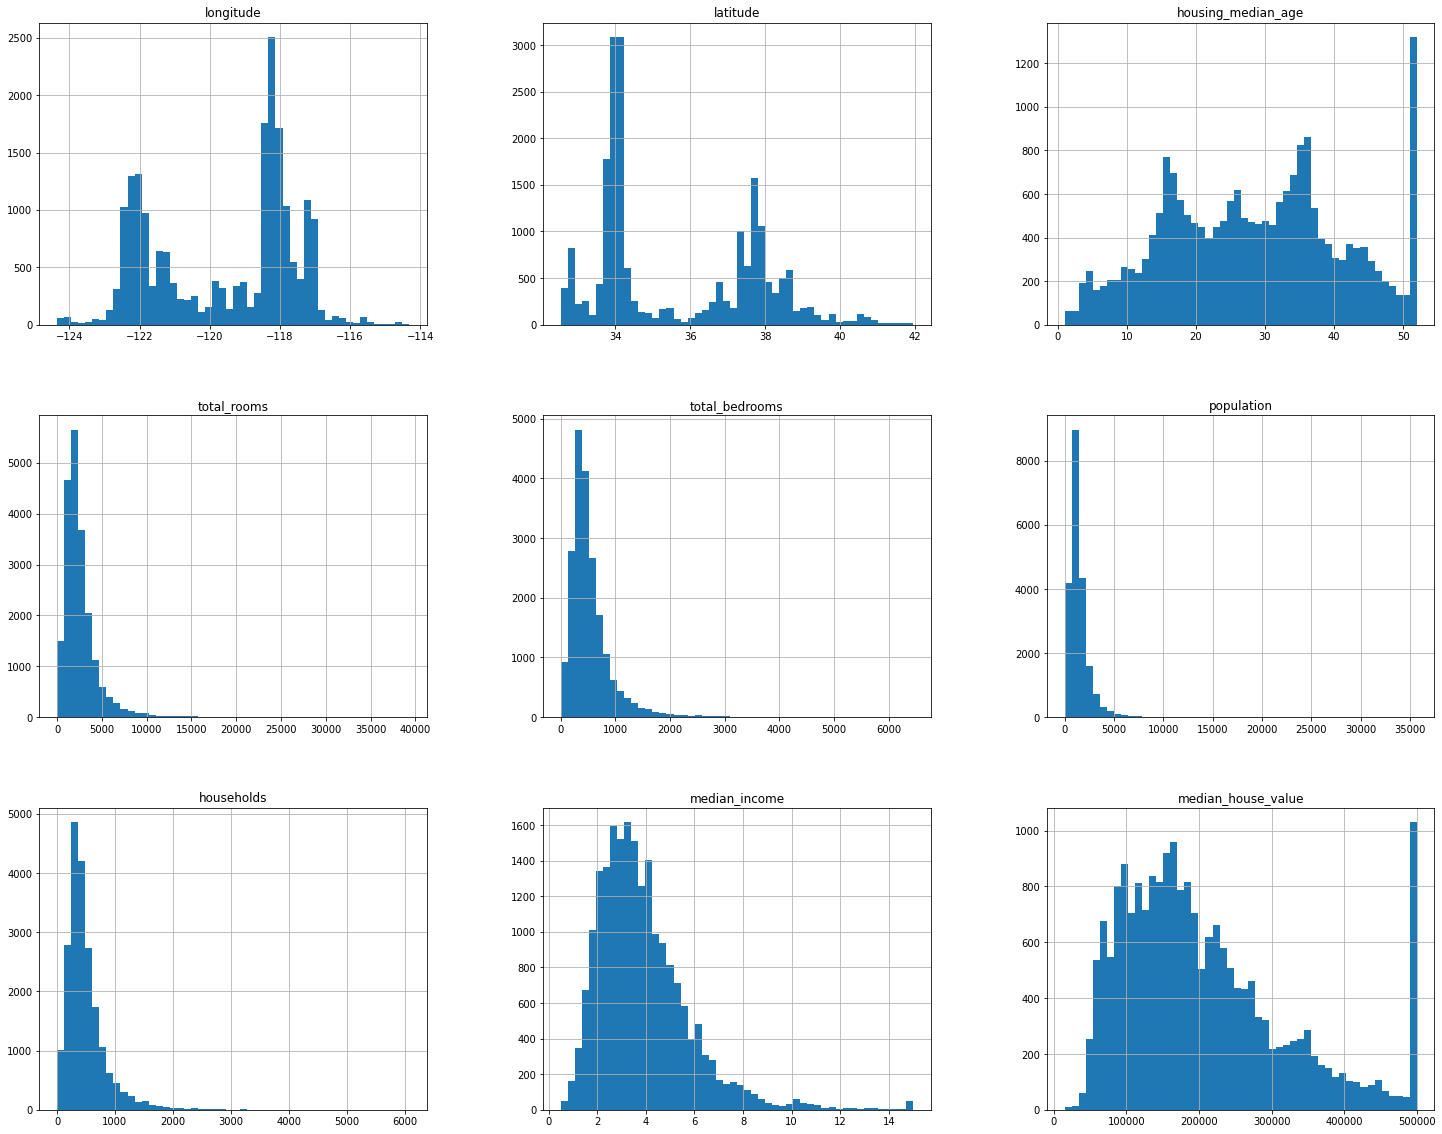

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50 , figsize=(25, 20)) # bins는 기준은 없지만 30, 40, 50을 주로 사용
plt.show()

데이터세트 만들기

# 데스트 세트 만들기
* 전체 데이터 세트를 활용해서 훈련하는 바람에 사용자의 새로운 데이테에 대한 예측이 잘 안되는 현상이 **데이터 스누핑 현황**을 방지
* 테스트 세트를 따로 만들어서 훈련 세트로 알고리즘을 훈련 후에 테스트 세트의 오차를 **일반화 오차**

## 데이터 쪼개기(split)
* 훈련 세트와 데스트 세트의 비율은 8:2 또는 7.5:2.5로 설정

* 테스트 세트를 생성할 때는 전체 데이터를 한번 섞고(shuffle) 잘라야(split)한다

In [34]:
# 무작위로 데이터 선택하기
import numpy as np
np.random.permutation(100) # 0~99까지으이 정수 100개를 랜덤하게 생성

array([16, 23, 44, 42, 14, 33, 12, 29, 92, 81, 76, 73, 79, 30, 48, 68, 55,
       82,  6, 63,  8, 54, 36, 18, 85,  9, 95, 35, 31, 91, 24, 87, 47, 64,
       71, 43,  3, 15, 78, 60, 99,  4, 58, 10, 61, 93, 51, 89, 49, 22, 39,
        7, 50, 40, 41, 38, 59, 11, 72, 88, 77, 17, 57, 90, 52, 26, 80, 74,
       21, 20, 19, 27,  0, 97, 25, 56, 98, 34, 96, 37, 32, 83, 84, 46, 75,
       67,  5,  1, 13, 45, 28, 70, 94, 66, 53, 86, 62, 69, 65,  2])

In [44]:
# data: 잘라낼 데이터 전체
# test_ratio : 데스트 데이터의 비율
def split_train_test(data, test_ratio=0.2):
    #데이터 개수 만큼 무작위 인덱스를 가진 리스트 생성
    shuffled_indices = np.random.permutation(len(data))

    # 데스트 세트의 크기 구하기
    test_set_size = int(len(data) * test_ratio)

    # 데스트 세트의 인덱스 구하기
    test_indices = shuffled_indices[: test_set_size]

    # 훈련 세트의 인덱스
    train_indices = shuffled_indices[test_set_size : ]

    return data.iloc[train_indices], data.iloc[test_indices]


In [45]:
df_train, df_test = split_train_test(housing)
print(f"훈련 세트의 길이 : {len(df_train)} / 데스트 세트의 길이 : {len(df_test)}")

훈련 세트의 길이 : 16512 / 데스트 세트의 길이 : 4128


훈련 세트로 훈련을 하고, 테스트 세트로 테스트를 진행
* **테스트 세트는** 런칭 직전까지 **한번도 사용되어선 안된다.**

문제점
* 랜덤을 무한하게 돌리면 언젠가는 머신러닝 알고리즘이 모든 데이터를 다 사용

해결책
* 난수 발생 초깃값 (랜덤 시드)을 고정 - `np.random.seed(42)`
* 각 샘플(행) 마다의 해시값을 구하여 20%보다 작거나 같은 샘플만 테스트 세트로 보낸다.

1. `np.random.seed`를 사용했을 때의 장/단점
* 장점 : 항상 같은 random이 발생되어서 안정적임. 데이터의 변경 없이 모델 알고리즘만 변경하면 좋다.
* 단점 : 데이터 세트에 추가 / 삭제 등의 변경이 일어나면 다시 섞여버린다.


**해시값**을 사용한 방법
- 해시값: 어떠한 데이터의 고유값

In [43]:
from zlib import crc32
def test_set_check(identifier, test_ratio=0.2):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


`test_set_check`의 결과물 : `True / False`가 등장
* `True` : Test Set로 들어가야 할 데이터
* `False` : Train Set로 들어가야 할 데이터

In [41]:
test_set_check(2)

654825492

In [69]:
# hash 값을 기준으로 자르기
# data : 전체 데이터
# test_ratio : 데스트 세트 비율
# id_columns : id로 삼을 컬럼의 이름
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]

    # 데스트 세트로 포함될 위치 구하기
    in_test_set = ids.apply( lambda id_ : test_set_check(id_, test_ratio)  )
    return data.loc[~in_test_set], data.loc[in_test_set] # True와 False를 반전시킴

housing 데이터세트에는 식별자(id)로 사용할 수 있는게 **행의 인덱스**밖에 없다. 식별자 값으로 행의 index를 사용하면 제약 사항이 있습니다.

* 새로운 데이터의 추가는 반드시 행의 끝에서만 일어날 것
* 어떠한 행도 삭제되면 안된다.

위 두가지 제약사람 때문에 아까 랜덤으로 했을 때랑 별 다른 이점이 없다..

**고유 식별자**로 선정해햐할 데이터
housing 데이터 세트에는 바뀌지 않을 위도,경도를 사용하자

In [70]:
# 행의 인덱스를 이용해 데이터 세트를 나누는 경우 : 제약사항이 있다
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [71]:
# 몇백년 간은 바뀌지 않을 위도와 경도를 사용해서 데이터를 나눠보기

housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

잘 되어 있는거 쓰는게 낫겠지

In [72]:
# 머신러닝 과학자들이 잘 만들어 놨어요. 알고리즘, 데이터 등등에 관하여...
# sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #random_state 매개변수를 이용해 랜덤 고정


`train_test_split`은 기본적으로 Shuffle - Split 지원

# 샘플링 편향과 계층적 샘플링


In [74]:
housing['income_cat'] = pd.cut(
    housing['median_income'], # 계층을 구할 데이터
    bins =[0.0, 1.5, 3.0, 4.0, 6.0, np.inf], # 구간(계층)
    labels=[1, 2, 3, 4, 5]
)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


각 구간별로 계층적 샘플링 수행

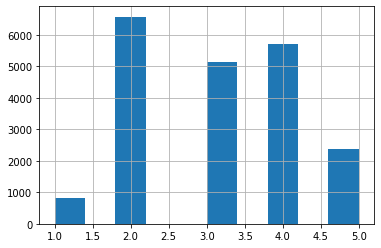

In [75]:
# 계층 별 데이터의 빈도 확인
housing['income_cat'].hist()
plt.show()

사이킷런의 StratifiedShuffleSplit을 활용하여 섞기+계층별 스플릿까지

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)
# split에서 쪼개지게 되면 train / test 데이터의 인덱스가 등장
for train_index, test_index in strat_shuff_split.split(housing, housing['income_cat']):
    strat_train_set =housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [79]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)


2    0.318798
4    0.277374
3    0.249516
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

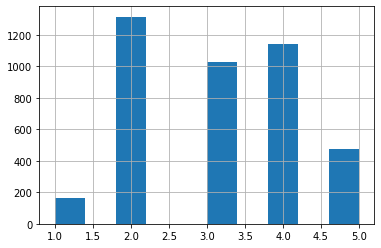

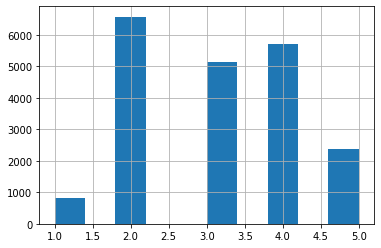

In [80]:
strat_test_set['income_cat'].hist()
plt.figure()
housing['income_cat'].hist()
plt.show()